# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (ARIMA, Est)
from lib import (stack, fpoints, fcurve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
nsample = 1000

def comparison(φ_vals, σ, ylim, *params):
    title = "AR(p) Comparison Plot"
    labels = [f"φ={val}" for val in φ_vals] 
    scan = ARIMA.Source.AR.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)
    return scan

## Simulations

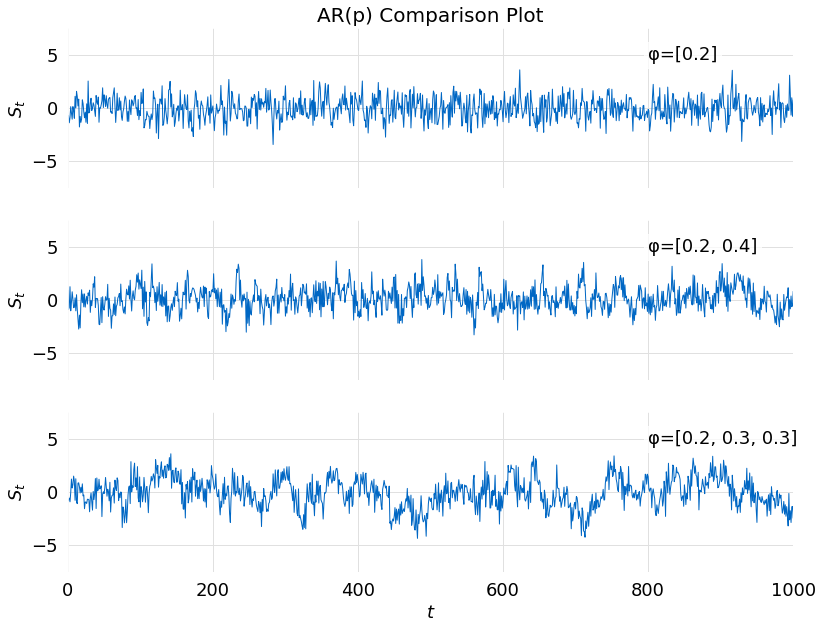

In [3]:
σ = 1.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-7.5, 7.5], *params)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example $\varphi = 0.2$

In [4]:
df = ARIMA.Func.PACF.apply(ar[0], nlags=1)
df.head()

,τ,ρ(τ)
1,1.0,0.195148


In [5]:
results = ARIMA.Est.AR.perform(ar[0], order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1439.687
Date:                Sat, 16 Jul 2022   AIC                           2885.374
Time:                        15:21:02   BIC                           2900.101
Sample:                             0   HQIC                          2890.971
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0261      0.040     -0.650      0.515      -0.105       0.052
ar.L1          0.1952      0.031      6.224      0.000       0.134       0.257
sigma2         1.0393      0.048     21.532      0.000       0.945       1.134
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.94   Prob(JB):                         0.64
Heteroskedasticity (H):               1.03   Skew:                             0.03
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
ar[0].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '16/07/2022 15:21:01',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(1)-Simulation-693be023-c063-4cac-bb5d-6cdd395fed5a',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 1.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(1)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': -0.026057119258646018,
     'Error': 0.04006764409994025,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.19516010375292417,
      'Error': 0.03135450051300465,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 1.039

### AR(2) Example $\varphi = [0.2, 0.4]$

In [7]:
df = ARIMA.Func.PACF.apply(ar[1], nlags=2)
df.head()

,τ,ρ(τ)
1,1.0,0.190616
2,2.0,0.406722


In [8]:
results = ARIMA.Est.AR.perform(ar[1], order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1423.006
Date:                Sat, 16 Jul 2022   AIC                           2854.012
Time:                        15:21:02   BIC                           2873.647
Sample:                             0   HQIC                          2861.475
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1320      0.079      1.673      0.094      -0.023       0.287
ar.L1          0.1900      0.028      6.732      0.000       0.135       0.245
ar.L2          0.4066      0.030     13.554      0.000       0.348       0.465
sigma2         1.0048      0.045     22.108      0.000       0.916       1.094
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.21
Prob(Q):                              0.94   Prob(JB):                         0.20
Heteroskedasticity (H):               0.89   Skew:                             0.14
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ar[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '16/07/2022 15:21:01',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(2)-Simulation-54f3c823-6a1b-41de-9a41-19fc58583306',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(2)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': 0.13197259746397805,
     'Error': 0.07887341737862243,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.18997606776065182,
      'Error': 0.028218360024285648,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.406633797

### AR(3) Example $\varphi = [0.2, 0.3, 0.3]$

In [10]:
df = ARIMA.Func.PACF.apply(ar[2], nlags=3)
df.head()

,τ,ρ(τ)
1,1.0,0.275702
2,2.0,0.253742
3,3.0,0.291973


In [11]:
results = ARIMA.Est.AR.perform(ar[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1421.255
Date:                Sat, 16 Jul 2022   AIC                           2852.510
Time:                        15:21:02   BIC                           2877.053
Sample:                             0   HQIC                          2861.837
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1161      0.178     -0.651      0.515      -0.466       0.233
ar.L1          0.2753      0.029      9.623      0.000       0.219       0.331
ar.L2          0.2544      0.031      8.302      0.000       0.194       0.315
ar.L3          0.2931      0.029     10.072      0.000       0.236       0.350
sigma2         1.0008      0.046     21.535      0.000       0.910       1.092
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.83   Prob(JB):                         0.57
Heteroskedasticity (H):               0.84   Skew:                            -0.04
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
ar[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '16/07/2022 15:21:01',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(3)-Simulation-64d8810c-dfec-43da-89ae-2ca6db88d6ee',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 1.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': -0.1161075169243171,
     'Error': 0.1782778681089121,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.27527813152400127,
      'Error': 0.028604785026384267,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.25443

## Simulations $\sigma = 5.0$

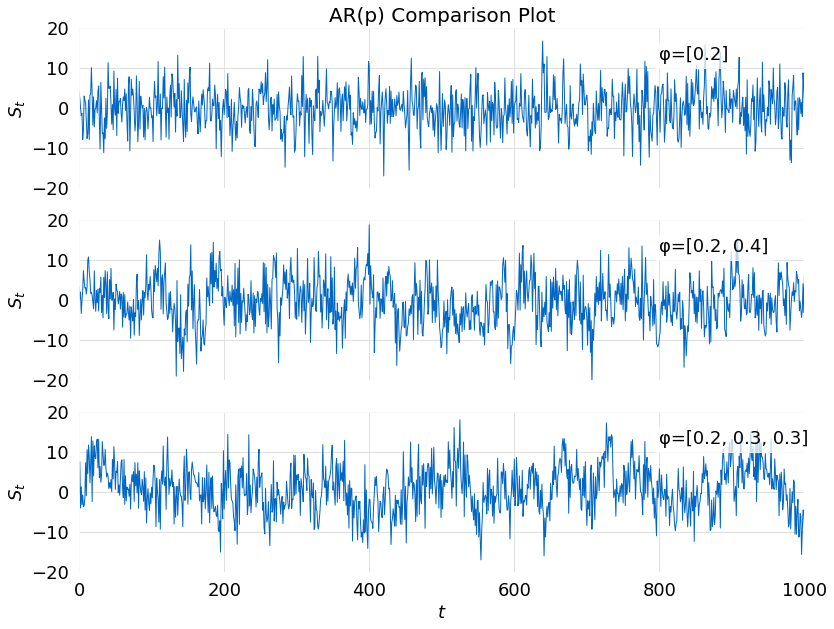

In [13]:
σ = 5.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-20.0, 20.0], *params)

### AR(1) Example ($\varphi = 0.2$)

In [14]:
df = ARIMA.Func.PACF.apply(ar[0], nlags=1)
df.head()

,τ,ρ(τ)
1,1.0,0.191768


In [15]:
results = ARIMA.Est.AR.perform(ar[0], order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3022.916
Date:                Sat, 16 Jul 2022   AIC                           6051.832
Time:                        15:21:02   BIC                           6066.558
Sample:                             0   HQIC                          6057.428
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1026      0.194     -0.529      0.597      -0.483       0.277
ar.L1          0.1917      0.032      5.922      0.000       0.128       0.255
sigma2        24.5777      1.062     23.146      0.000      22.496      26.659
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.94   Prob(JB):                         0.57
Heteroskedasticity (H):               1.11   Skew:                            -0.01
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
ar[0].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '16/07/2022 15:21:02',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(1)-Simulation-8932bf23-7df3-47c1-b930-7c8cd46575bb',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(1)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': -0.10261906211287664,
     'Error': 0.19385656895542694,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.19170909823724447,
      'Error': 0.0323735618086275,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 24.5777

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [17]:
df = ARIMA.Func.PACF.apply(ar[1], nlags=2)
df.head()

,τ,ρ(τ)
1,1.0,0.218908
2,2.0,0.375292


In [18]:
results = ARIMA.Est.AR.perform(ar[1], order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3042.913
Date:                Sat, 16 Jul 2022   AIC                           6093.827
Time:                        15:21:03   BIC                           6113.462
Sample:                             0   HQIC                          6101.289
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3590      0.393     -0.912      0.362      -1.130       0.412
ar.L1          0.2187      0.029      7.494      0.000       0.161       0.276
ar.L2          0.3752      0.030     12.557      0.000       0.317       0.434
sigma2        25.5704      1.110     23.046      0.000      23.396      27.745
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.99   Prob(JB):                         0.72
Heteroskedasticity (H):               0.92   Skew:                            -0.00
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
ar[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '16/07/2022 15:21:02',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(2)-Simulation-e90663ec-df9b-4eae-a5e8-59fe47674a4b',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(2)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': -0.3589570794040652,
     'Error': 0.39346620171314023,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.21868347345257202,
      'Error': 0.029180700051799065,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.375238410

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [20]:
df = ARIMA.Func.PACF.apply(ar[2], nlags=3)
df.head()

,τ,ρ(τ)
1,1.0,0.198025
2,2.0,0.281070
3,3.0,0.234237


In [21]:
results = ARIMA.Est.AR.perform(ar[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2993.213
Date:                Sat, 16 Jul 2022   AIC                           5996.425
Time:                        15:21:03   BIC                           6020.969
Sample:                             0   HQIC                          6005.753
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8800      0.533      1.652      0.099      -0.164       1.924
ar.L1          0.1979      0.032      6.188      0.000       0.135       0.261
ar.L2          0.2817      0.030      9.456      0.000       0.223       0.340
ar.L3          0.2353      0.030      7.799      0.000       0.176       0.294
sigma2        23.1487      1.062     21.802      0.000      21.068      25.230
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.96   Prob(JB):                         0.67
Heteroskedasticity (H):               0.93   Skew:                             0.06
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
ar[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '16/07/2022 15:21:02',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(3)-Simulation-00c8291f-b589-4867-b326-171db5a27192',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 5.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': 0.8800183946027678,
     'Error': 0.5328275393232601,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.19785576774032004,
      'Error': 0.03197271514060519,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.2817427